## load data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix 
import seaborn as sns
from tensorflow.keras.datasets import cifar10

In [42]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [43]:
print(f"X_train : {X_train.shape}, X_test : {X_test.shape}")
print(f"y_train : {y_train.shape}, y_test : {y_test.shape}")

X_train : (50000, 32, 32, 3), X_test : (10000, 32, 32, 3)
y_train : (50000, 1), y_test : (10000, 1)


## model create & learning

In [4]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, models

In [5]:
def build_model():
    model = models.Sequential()
    model.add(layers.Convolution2D(8, (3, 3), activation='relu', input_shape=(32,32,3))) 
    model.add(layers.BatchNormalization())

    model.add(layers.Convolution2D(16, (3, 3), activation='relu')) 
    model.add(layers.BatchNormalization())

    model.add(layers.MaxPooling2D(pool_size = (2, 2))) 

    model.add(layers.Convolution2D(10, 1, activation='relu')) 

    model.add(layers.Convolution2D(32, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())

    model.add(layers.MaxPooling2D(pool_size = (2, 2)))
    model.add(layers.Convolution2D(10, 1, activation='relu'))

    model.add(layers.Convolution2D(10, 6)) 

    model.add(layers.Flatten()) #flatten image dimension into 1
    model.add(layers.Activation('softmax'))
    return model

In [6]:
model = build_model()

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 8)         224       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 8)         32        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 10)        170       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        2

In [48]:
# optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer='sgd', loss='categorical_crossentropy',
             metrics=['accuracy'])

In [49]:
X_test = X_test.astype('float32')
X_test /= 255
Y_test = keras.utils.to_categorical(y_test, 10)

In [52]:
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
X = X_train
y = y_train
X = X.astype('float32')
X /= 255
y = keras.utils.to_categorical(y, 10)

In [ ]:
history = model.fit(X, y, batch_size=128,
                    validation_data=(X_test, Y_test),
                    nb_epoch=100, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 20s 391us/sample - loss: 1.9273 - accuracy: 0.2954 - val_loss: 1.7708 - val_accuracy: 0.3484
Epoch 2/100
50000/50000 [==============================] - 18s 364us/sample - loss: 1.5673 - accuracy: 0.4266 - val_loss: 1.6489 - val_accuracy: 0.4056
Epoch 3/100
50000/50000 [==============================] - 18s 367us/sample - loss: 1.4456 - accuracy: 0.4734 - val_loss: 1.4181 - val_accuracy: 0.4765
Epoch 4/100
50000/50000 [==============================] - 18s 365us/sample - loss: 1.3748 - accuracy: 0.5031 - val_loss: 1.5621 - val_accuracy: 0.4476
Epoch 5/100
50000/50000 [==============================] - 18s 366us/sample - loss: 1.3194 - accuracy: 0.5227 - val_loss: 1.5034 - val_accuracy: 0.4623
Epoch 6/100
50000/50000 [==============================] - 18s 365us/sample - loss: 1.2733 - accuracy: 0.5382 - val_loss: 1.3553 - val_accuracy: 0.5096
Epoch 7/100
50000/50000 [=============

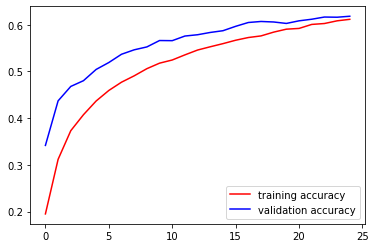

In [14]:
# for history in historys:
#     plt.plot(history.history['accuracy'],'r')
#     plt.plot(history.history['val_accuracy'],'b')
#     plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
#     plt.show()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

## inference

In [15]:
predictions = model.predict_classes(X_test)
predictions

array([6, 8, 8, ..., 5, 1, 7], dtype=int64)

In [16]:
score = model.evaluate(X_test, Y_test, verbose=0)
score

[1.090052477645874, 0.6183]

In [17]:
y_test = np.argmax(Y_test, axis=1)

## Misclassified images

In [18]:
index = 0
mis = []
for label, predict in zip(y_test, predictions):
    if label != predict:
        mis.append(index)
    index += 1

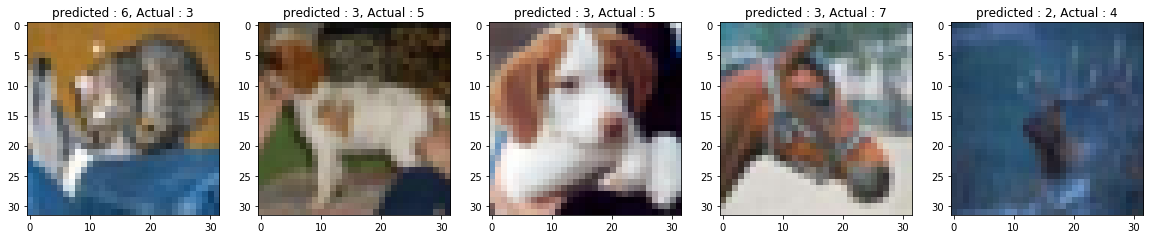

In [19]:
plt.figure(figsize=(20, 4))
for pi, bi in enumerate(mis[:5]):
    plt.subplot(1, 5, pi + 1)
    img = X_test[bi].reshape(3072,)
    r, g, b = img[0:1024].reshape(32, 32), img[1024:2048].reshape(32, 32), img[2048:].reshape(32, 32)
    im = np.dstack((r, g, b))
    plt.imshow(im)
    plt.title(f"predicted : {predictions[bi]}, Actual : {y_test[bi]}")

## confusion Matrix

In [20]:
cm = confusion_matrix(y_test, predictions)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

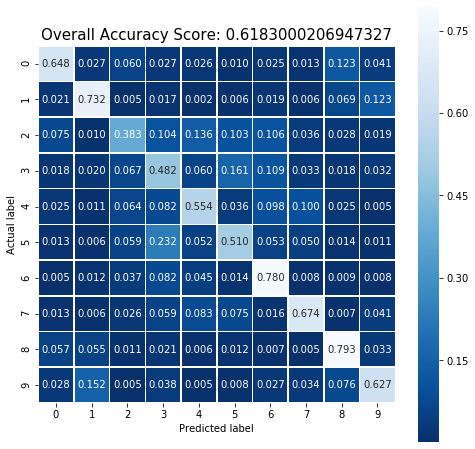

In [21]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0}'.format(score[1])
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show();

### load data using pickle 

In [ ]:
# def unpickle(file):
#     with open(file, 'rb') as fo:
#         return pickle.load(fo, encoding='bytes')
# datasets = {}
# for i in range(1, 6):
#     a = unpickle(f'cifar-10-batches-py/data_batch_{i}')
#     datasets[a[b'batch_label']] = a
#     print(a[b'data'])
# y_temp = []
# for key in datasets.keys():
#     temp = {}
#     dt = datasets[key][b'labels']
#     for i in range(10):
#         if temp.get(i) == None:
#             temp[i] = dt.count(i)
#     print(temp)
#     y_temp.extend(dt)
# len(y_temp)
# for i in range(10):
#     print(i, y_temp.count(i))
# X_temp = []
# for key in datasets.keys():
#     for v in datasets[key][b'data']:
#         X_temp.append(v)
# X_temp = np.array(X_temp)
# X_temp.shape
# test_dataset = unpickle('cifar-10-batches-py/test_batch')
# X_test = test_dataset[b'data']
# y_test = np.array(test_dataset[b'labels'])
# print(X_test.shape, y_test.shape)
# print(X_test)